## Observations and Insights 

In [672]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [673]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [674]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [675]:
#Comine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [676]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [677]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [678]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_df.loc[mouse_df["Mouse ID"] == 'g989']

duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [679]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.loc[mouse_df["Mouse ID"] != 'g989']
clean_mouse_df
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [680]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df.shape

(1880, 8)

In [681]:
#Check the number of unique mice in the clean DataFrame

clean_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [682]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
median_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
var_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
std_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem_drug = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)

yrdrugsnameddisway= pd.DataFrame({
                                "Mean Tumor": mean_drug,
                                "Median Tumor": median_drug,
                                "Tumor Variance": var_drug,
                                "Tumor Std. Dev": std_drug,
                                "Tumor Std. Error": sem_drug
                                })
yrdrugsnameddisway


,Mean Tumor,Median Tumor,Tumor Variance,Tumor Std. Dev,Tumor Std. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [683]:
# Using the aggregation method, produce the same summary statistics in a single line
yrdrugsnameddisway = clean_mouse_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

yrdrugsnameddisway

,Tumor Volume (mm3)
mean,50.435293
median,48.933454
var,79.462907
std,8.914197
sem,0.205591


## Bar and Pie Charts

In [684]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#create group on 'Mouse ID' column
testing_mice = clean_mouse_df.groupby('Drug Regimen')
#count unique mouse
counting_mice = testing_mice['Mouse ID'].count()

counting_mice


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

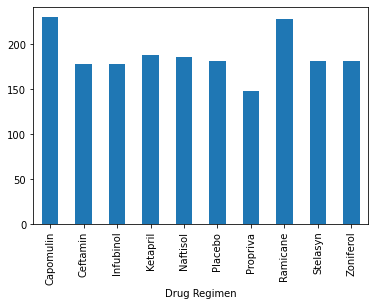

In [685]:
#bar plot
threeguyswalkintoa = counting_mice.plot(kind='bar')

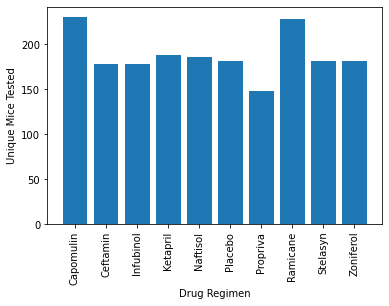

In [686]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
y_axis = counting_mice

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Unique Mice Tested')
plt.xticks(rotation=90)

plt.show()


In [687]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a gender grouping by grouping on the 'Sex' column.
girlsvsboys = clean_mouse_df.groupby('Sex')

#Count how many times each Unique Mouse ID appears in the group.
girlsvsboys = girlsvsboys['Mouse ID'].count()

girlsvsboys

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

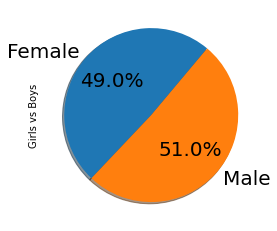

In [688]:
# Generate a pie chart using pandas
winnergetspie = girlsvsboys.plot(kind='pie', xlabel='',ylabel='Girls vs Boys', shadow=True,startangle=50,autopct='%1.1f%%',fontsize=20)

#,auto pct = '%1.1f%%',explode=explode

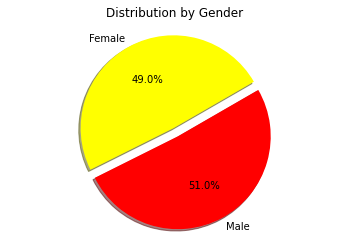

In [689]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
colors = ['yellow', 'red']
explode = (0.1,0)

#Create the pie chart
plt.pie(girlsvsboys,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=30)
plt.title("Distribution by Gender")
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [690]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
lasttime = clean_mouse_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lasttimemerg = lasttime.merge(clean_mouse_df,on=['Mouse ID','Timepoint'])
lasttimemerg.head()


,index,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,32.997729,1


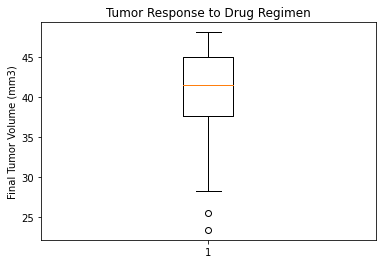

The lower quartile of tumor volume response is: 37.685932865 (mm3)
The upper quartile of tumor volume response is: 45.0 (mm3)
The interquartile range of tumor volume response is: 7.314067135000002 (mm3)
The the median of tumor volume response is: 41.557808879999996 (mm3)
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


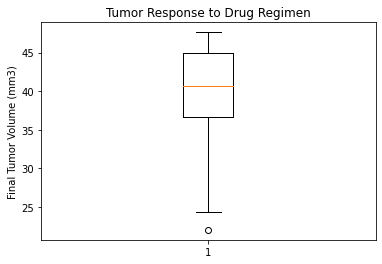

The lower quartile of tumor volume response is: 36.67463458499999 (mm3)
The upper quartile of tumor volume response is: 45.0 (mm3)
The interquartile range of tumor volume response is: 8.325365415000007 (mm3)
The the median of tumor volume response is: 40.67323554 (mm3)
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


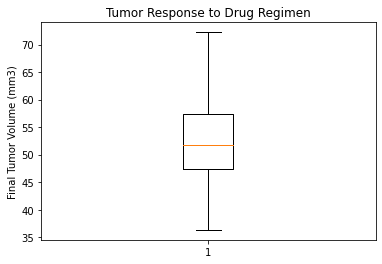

The lower quartile of tumor volume response is: 47.3123533 (mm3)
The upper quartile of tumor volume response is: 57.314443967500004 (mm3)
The interquartile range of tumor volume response is: 10.002090667500006 (mm3)
The the median of tumor volume response is: 51.82058438 (mm3)
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


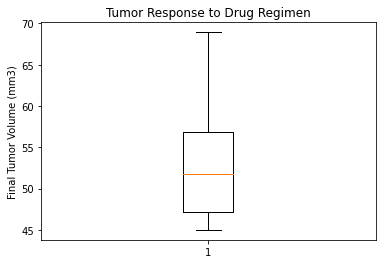

The lower quartile of tumor volume response is: 47.208427112500004 (mm3)
The upper quartile of tumor volume response is: 56.801437570000004 (mm3)
The interquartile range of tumor volume response is: 9.5930104575 (mm3)
The the median of tumor volume response is: 51.77615728000001 (mm3)
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


In [691]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    #drug_vol = max_tmpt_merged.loc[max_tmpt_merged['Drug Regimen'] == treatment]
    
    drug_vol = lasttimemerg.loc[lasttimemerg['Drug Regimen_x'] == treatment, 'Tumor Volume (mm3)_x']
    
    # add subset to add to the tumor data list
    
    tumor_data.append(drug_vol)
    
    # Determine outliers using upper and lower bounds
    #Do this on drug_vol, get the block of code where we did outliers
    
    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor Response to Drug Regimen')
    ax1.set_ylabel('Final Tumor Volume (mm3)')
    ax1.boxplot(drug_vol)
    plt.show()
    
    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of tumor volume response is: {lowerq} (mm3)")
    print(f"The upper quartile of tumor volume response is: {upperq} (mm3)")
    print(f"The interquartile range of tumor volume response is: {iqr} (mm3)")
    print(f"The the median of tumor volume response is: {quartiles[0.5]} (mm3)")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

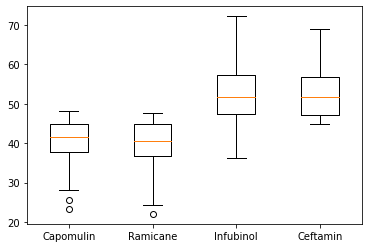

In [692]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data, labels=treatments)
plt.show()

## Line and Scatter Plots

In [693]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_mice_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']

Capomulin_mice_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [694]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Extract Mouse ID = k403

Mouse_x401 = Capomulin_mice_df.loc[Capomulin_mice_df['Mouse ID'] == 'x401']
Mouse_x401

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


<function matplotlib.pyplot.show(close=None, block=None)>

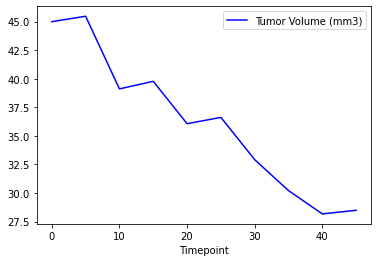

In [695]:
#Plot Tumor Volume and Timepoint for Mouse ID s185
Mouse_x401.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)', color ='blue')
plt.show

In [696]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Create average tumor volume group
Avg_tumor_vol = Capomulin_mice_df.groupby('Mouse ID').mean()


Avg_tumor_vol.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

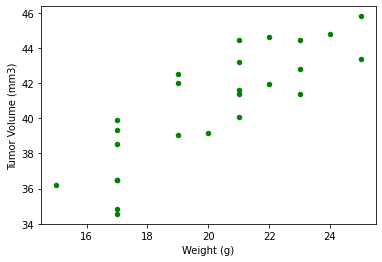

In [697]:
#Create scatter plot
Avg_tumor_vol.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='green')

## Correlation and Regression

In [698]:
# Calculate the correlation coefficient and linear regression model 
avg_tumor_size = Avg_tumor_vol.iloc[:,3]
mouse_weight = Avg_tumor_vol.iloc[:,1]

correlation = st.pearsonr(mouse_weight,avg_tumor_size)

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


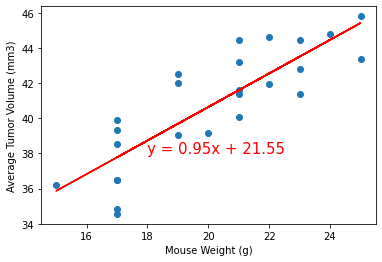

In [699]:

#Calculate the linear regression and fit the slope-intercept equation to the scatter plot.

x_values = Avg_tumor_vol['Weight (g)']
y_values = Avg_tumor_vol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()